In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import folium

In [2]:
data = pd.read_csv('kc_house_data_train.csv')

In [3]:
data.head()

Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  2591820310  20141006T000000   365000.0         4       2.25   
1           1  7974200820  20140821T000000   865000.0         5       3.00   
2           2  7701450110  20140815T000000  1038000.0         4       2.50   
3           3  9522300010  20150331T000000  1490000.0         3       3.50   
4           4  9510861140  20140714T000000   711000.0         3       2.50   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         2070      8893     2.0           0  ...      8        2070   
1         2900      6730     1.0           0  ...      8        1830   
2         3770     10893     2.0           0  ...     11        3770   
3         4560     14608     2.0           0  ...     12        4560   
4         2550      5376     2.0           0  ...      9        2550   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1986             0    98058  47.4388 -122.162   
1           1070      1977             0    98115  47.6784 -122.285   
2              0      1997             0    98006  47.5646 -122.129   
3              0      1990             0    98034  47.6995 -122.228   
4              0      2004             0    98052  47.6647 -122.083   

   sqft_living15  sqft_lot15  
0           2390        7700  
1           2370        6283  
2           3710        9685  
3           4050       14226  
4           2250        4050  

[5 rows x 22 columns]

In [4]:
data = data.drop(columns = 'Unnamed: 0')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


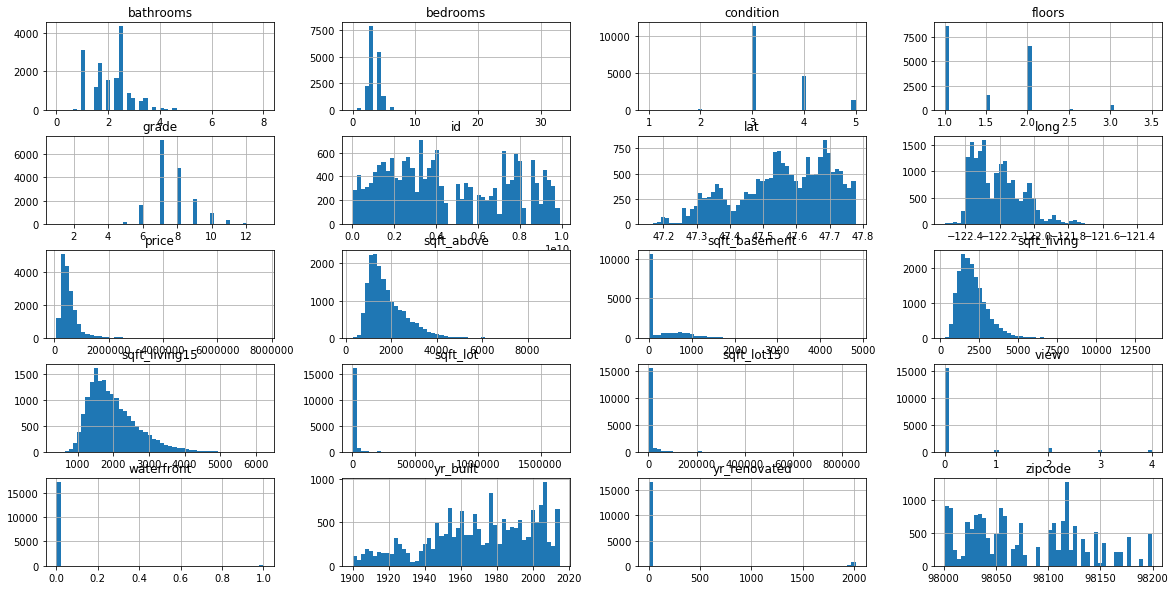

In [6]:
data.hist(bins = 50, figsize = (20,10))
plt.show()

In [ ]:
continuous variables - price, sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot, yr_built

categoricals - bathrooms, bedrooms, condition, floors, grade, view, waterfront

In [7]:
data.zipcode.value_counts()

98052    474
98115    465
98103    461
98038    455
98117    437
        ... 
98102     80
98010     74
98024     65
98148     43
98039     42
Name: zipcode, Length: 70, dtype: int64

In [5]:
train_set, test_set = train_test_split(data, test_size=0.25, random_state=99, stratify=data.zipcode)

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12967 entries, 7018 to 3888
Data columns (total 21 columns):
id               12967 non-null int64
date             12967 non-null object
price            12967 non-null float64
bedrooms         12967 non-null int64
bathrooms        12967 non-null float64
sqft_living      12967 non-null int64
sqft_lot         12967 non-null int64
floors           12967 non-null float64
waterfront       12967 non-null int64
view             12967 non-null int64
condition        12967 non-null int64
grade            12967 non-null int64
sqft_above       12967 non-null int64
sqft_basement    12967 non-null int64
yr_built         12967 non-null int64
yr_renovated     12967 non-null int64
zipcode          12967 non-null int64
lat              12967 non-null float64
long             12967 non-null float64
sqft_living15    12967 non-null int64
sqft_lot15       12967 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.2+ MB


In [10]:
data.zipcode.value_counts()/len(data)

98052    0.027415
98115    0.026894
98103    0.026663
98038    0.026316
98117    0.025275
           ...   
98102    0.004627
98010    0.004280
98024    0.003759
98148    0.002487
98039    0.002429
Name: zipcode, Length: 70, dtype: float64

In [11]:
train_set.zipcode.value_counts()/len(train_set)

98052    0.027377
98115    0.026914
98103    0.026683
98038    0.026298
98117    0.025295
           ...   
98102    0.004627
98010    0.004319
98024    0.003779
98039    0.002468
98148    0.002468
Name: zipcode, Length: 70, dtype: float64

In [12]:
train_set.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.296700e+04  1.296700e+04  12967.000000  12967.000000  12967.000000   
mean   4.579568e+09  5.419999e+05      3.377265      2.116816   2086.116064   
std    2.878564e+09  3.764234e+05      0.943262      0.776239    924.085384   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.115615e+09  3.222500e+05      3.000000      1.500000   1430.000000   
50%    3.904940e+09  4.510000e+05      3.000000      2.250000   1920.000000   
75%    7.314800e+09  6.450000e+05      4.000000      2.500000   2541.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.296700e+04  12967.000000  12967.000000  12967.000000  12967.000000   
mean   1.506060e+04      1.489743      0.008560      0.238374      3.408807   
std    4.202809e+04      0.539518      0.092128      0.777012      0.650106   
min    5.720000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.077000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.643000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.073400e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  12967.000000  12967.000000   12967.000000  12967.000000  12967.000000   
mean       7.655664   1790.567440     295.548623   1970.749595     83.596900   
std        1.171199    829.764467     445.765906     29.412172    399.900142   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1570.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     570.000000   1996.000000      0.000000   
max       13.000000   9410.000000    4130.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  12967.000000  12967.000000  12967.000000   12967.000000   12967.000000  
mean   98078.177296     47.560122   -122.214353    1989.360993   12882.962135  
std       53.611159      0.138234      0.140739     686.377951   27674.325051  
min    98001.000000     47.155900   -122.519000     399.000000     659.000000  
25%    98033.000000     47.471600   -122.329000    1490.000000    5102.000000  
50%    98065.000000     47.571900   -122.230000    1840.000000    7626.000000  
75%    98118.000000     47.677750   -122.125000    2360.000000   10094.500000  
max    98199.000000     47.777600   -121.315000    6210.000000  858132.000000

In [6]:
train_set.date = train_set.date.apply(lambda x: x[0:8])
train_set.date = pd.to_datetime(train_set.date)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12967 entries, 7018 to 3888
Data columns (total 21 columns):
id               12967 non-null int64
date             12967 non-null datetime64[ns]
price            12967 non-null float64
bedrooms         12967 non-null int64
bathrooms        12967 non-null float64
sqft_living      12967 non-null int64
sqft_lot         12967 non-null int64
floors           12967 non-null float64
waterfront       12967 non-null int64
view             12967 non-null int64
condition        12967 non-null int64
grade            12967 non-null int64
sqft_above       12967 non-null int64
sqft_basement    12967 non-null int64
yr_built         12967 non-null int64
yr_renovated     12967 non-null int64
zipcode          12967 non-null int64
lat              12967 non-null float64
long             12967 non-null float64
sqft_living15    12967 non-null int64
sqft_lot15       12967 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 2.2 MB


/Users/nicksubic/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
train_set['renovated2000s'] = train_set.yr_renovated.apply(lambda x: 1 if x > 2000 else 0)

/Users/nicksubic/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
train_set.date.describe()

count                   12967
unique                    369
top       2014-06-26 00:00:00
freq                       87
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [8]:
def season(column):
    new_column = []
    for x in column:
        if x in pd.date_range(start = '2014-05-02', end= '2014-08-24'):
            new_column.append(1)
        elif x in pd.date_range(start = '2014-08-25', end= '2014-11-24'):
            new_column.append(2)
        elif x in pd.date_range(start = '2014-11-25', end= '2015-02-24'):
            new_column.append(3)
        elif x in pd.date_range(start = '2015-02-25', end= '2015-05-27'):
            new_column.append(4)
        else:
            new_column.append('out of range') 
    return new_column

# train_set['season'] = train_set.date.apply(lambda x: 'summer' if x in pd.date_range(start = '2014-05-02', end= '2014-08-24'), 'autumn' if x in pd.date_range(start = '2014-08-25', end= '2014-11-24'), 'winter' if x in pd.date_range(start = '2014-11-25', end= '2015-02-24'), 'spring' if x in pd.date_range(start = '2015-02-25', end= '2015-05-27'), else x)

In [9]:
train_set['season'] = season(train_set.date)

/Users/nicksubic/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
train_set.season.value_counts()

1    4633
2    3207
4    2958
3    2169
Name: season, dtype: int64

In [18]:
print(train_set.groupby(['season'])['price'].std())
print(train_set.groupby(['season'])['price'].median())

season
1    374469.269744
2    399216.617011
3    346559.791823
4    374394.734982
Name: price, dtype: float64
season
1    460000.0
2    445950.0
3    432000.0
4    465000.0
Name: price, dtype: float64


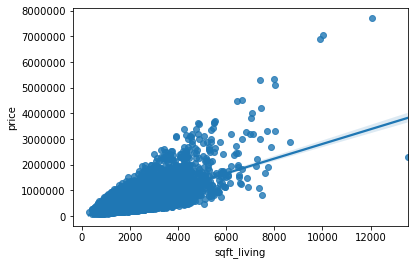

In [19]:
sns.regplot(train_set.sqft_living, train_set.price)

In [20]:
train_set.sqft_living.corr(train_set.price)

0.7027785354390488

In [11]:
y_train = train_set.price
X_train = pd.DataFrame(train_set[['sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'grade', 'view']])

dummy = DummyRegressor()

dummy.fit(X_train, y_train)

dummy.score(X_train, y_train)

0.0

In [12]:
y_pred = dummy.predict(X_train)

from sklearn.metrics import mean_squared_error
dummy_rmse = mean_squared_error(y_train, y_pred)
dummy_rmse**.5

376408.8360546109

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = lr.predict(X_train)
lr.score(X_train, y_train)

0.6327959512547509

In [15]:
lr_rsme = mean_squared_error(y_train, y_pred)
lr_rsme**.5

228093.83138488772

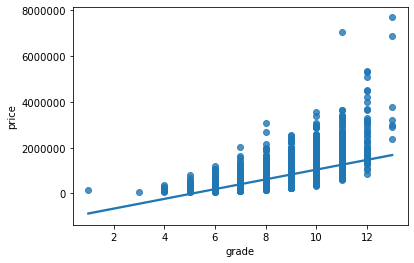

In [26]:
sns.regplot(train_set.grade, train_set.price)

In [83]:
train_set.corr()

id     price  bedrooms  bathrooms  sqft_living  \
id              1.000000 -0.016591 -0.010404  -0.000730    -0.016381   
price          -0.016591  1.000000  0.304535   0.526209     0.702779   
bedrooms       -0.010404  0.304535  1.000000   0.501970     0.566553   
bathrooms      -0.000730  0.526209  0.501970   1.000000     0.756720   
sqft_living    -0.016381  0.702779  0.566553   0.756720     1.000000   
sqft_lot       -0.128666  0.094655  0.027535   0.089312     0.171821   
floors          0.020817  0.253638  0.169460   0.497167     0.353441   
waterfront      0.001906  0.289324 -0.005215   0.067710     0.114909   
view            0.006129  0.404177  0.081960   0.193810     0.291671   
condition      -0.013081  0.040932  0.023408  -0.124633    -0.060336   
grade           0.000707  0.662303  0.355518   0.669387     0.762612   
sqft_above     -0.013205  0.607164  0.473200   0.692612     0.876228   
sqft_basement  -0.009378  0.326683  0.293649   0.279450     0.441987   
yr_built        0.012937  0.048414  0.153341   0.504886     0.315209   
yr_renovated   -0.021312  0.124758  0.015874   0.054357     0.055495   
zipcode        -0.001638 -0.049243 -0.146018  -0.203427    -0.193808   
lat            -0.002615  0.301947 -0.003592   0.024880     0.051413   
long            0.020486  0.019090  0.124712   0.224344     0.235962   
sqft_living15  -0.006179  0.584066  0.389238   0.572355     0.755866   
sqft_lot15     -0.134888  0.085790  0.025852   0.088774     0.182109   
renovated2000s -0.020622  0.100522  0.034375   0.068773     0.052087   
season          0.008792 -0.005159 -0.015202  -0.031684    -0.034994   

                sqft_lot    floors  waterfront      view  condition  ...  \
id             -0.128666  0.020817    0.001906  0.006129  -0.013081  ...   
price           0.094655  0.253638    0.289324  0.404177   0.040932  ...   
bedrooms        0.027535  0.169460   -0.005215  0.081960   0.023408  ...   
bathrooms       0.089312  0.497167    0.067710  0.193810  -0.124633  ...   
sqft_living     0.171821  0.353441    0.114909  0.291671  -0.060336  ...   
sqft_lot        1.000000 -0.004234    0.017165  0.085187  -0.011616  ...   
floors         -0.004234  1.000000    0.026593  0.022483  -0.265105  ...   
waterfront      0.017165  0.026593    1.000000  0.422921   0.014966  ...   
view            0.085187  0.022483    0.422921  1.000000   0.045556  ...   
condition      -0.011616 -0.265105    0.014966  0.045556   1.000000  ...   
grade           0.112873  0.459686    0.096653  0.254022  -0.139043  ...   
sqft_above      0.185592  0.526995    0.081033  0.170841  -0.155406  ...   
sqft_basement   0.010722 -0.248273    0.087372  0.286633   0.164199  ...   
yr_built        0.057854  0.478955   -0.022264 -0.048488  -0.359997  ...   
yr_renovated    0.004159  0.012277    0.088749  0.095231  -0.062676  ...   
zipcode        -0.123131 -0.057926    0.029955  0.080930   0.010691  ...   
lat            -0.079724  0.045544   -0.008356  0.002554  -0.004824  ...   
long            0.222126  0.128685   -0.044040 -0.073912  -0.114746  ...   
sqft_living15   0.138370  0.279551    0.096585  0.290392  -0.090017  ...   
sqft_lot15      0.714476 -0.013520    0.028602  0.081609  -0.003363  ...   
renovated2000s -0.012539  0.008826    0.016404  0.034951  -0.081031  ...   
season          0.007818 -0.019151    0.001039 -0.001857  -0.045185  ...   

                sqft_basement  yr_built  yr_renovated   zipcode       lat  \
id                  -0.009378  0.012937     -0.021312 -0.001638 -0.002615   
price                0.326683  0.048414      0.124758 -0.049243  0.301947   
bedrooms             0.293649  0.153341      0.015874 -0.146018 -0.003592   
bathrooms            0.279450  0.504886      0.054357 -0.203427  0.024880   
sqft_living          0.441987  0.315209      0.055495 -0.193808  0.051413   
sqft_lot             0.010722  0.057854      0.004159 -0.123131 -0.079724   
floors              -0.248273  0.478955      0.012277 -0.057926  0.045544   


In [53]:
train_set.groupby(['zipcode'])['price'].mean()

zipcode
98001    2.787908e+05
98002    2.320431e+05
98003    2.922944e+05
98004    1.420254e+06
98005    8.026698e+05
             ...     
98177    6.572353e+05
98178    3.082088e+05
98188    2.947938e+05
98198    2.940634e+05
98199    8.047025e+05
Name: price, Length: 70, dtype: float64

In [54]:
zip_dummies = pd.get_dummies(train_set.zipcode, prefix = 'zip', drop_first = True)

In [77]:
y_train = train_set.price

X_train1 = pd.concat([train_set[['sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'grade', 'view']], zip_dummies], axis = 1)

lr.fit(X_train1, y_train)

y_pred = lr.predict(X_train1)
lr.score(X_train1, y_train)

0.7774734032836031

In [78]:
lr_rsme = mean_squared_error(y_train, y_pred)
lr_rsme**.5

177562.3044390048

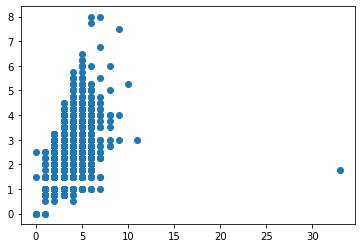

In [79]:
plt.scatter(train_set['bedrooms'], train_set['bathrooms'])

In [80]:
train_set.bedrooms.corr(train_set.bathrooms)

0.501970446675211

In [81]:
train_set['bedbath'] = train_set['bedrooms'] + train_set['bathrooms']

In [85]:
X_train1 = pd.concat([train_set[['sqft_living', 'bedbath', 'yr_built', 'grade', 'view']], zip_dummies], axis = 1)

lr.fit(X_train1, y_train)

y_pred = lr.predict(X_train1)
lr.score(X_train1, y_train)

0.7752759970514772

In [83]:
lr_rsme = mean_squared_error(y_train, y_pred)
lr_rsme**.5

178436.8471179119

(slightly better with both included- maybe there is a better way to combine these variables? For now returning to previous model.)

In [86]:
train_set['pricelog'] = np.log(train_set.price)

In [87]:
y_train1 = train_set['pricelog']

X_train1 = pd.concat([train_set[['sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'grade', 'view']], zip_dummies], axis = 1)

lr.fit(X_train1, y_train1)

y_pred = lr.predict(X_train1)
lr.score(X_train1, y_train1)

0.862194756512932

In [88]:
lr_rsme = mean_squared_error(y_train1, y_pred)
lr_rsme**.5

0.19560354713281122